In [2]:
import sklearn

import gensim.downloader as gensim_api
gensim_info = gensim_api.info()


In [3]:
###
# We now load one space. 
# Spaces differ in size, but also in the data on which they were trained.
# 
# I've chosen a mid-size one to get reasonable performance
# with not too gigantic a download,
# and I've chosen one trained on Wikipedia, which should give
# you a nice variety of contexts, along with gigaword,
# which is all news.
# 
# Feel free to choose a different space
# if this one is too slow to load on your machine --
# but note that your results will be slightly different
# than the ones I demonstrate. 
space = gensim_api.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 376.1/376.1MB downloaded


In [19]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

###
# function that visualizes the nearest neighbors of a given word.
# parameters:
# - word: central word whose neighborhood to visualize
# - space: gensim Word2VecKeyedVectors object, like the space object we 
#   made above
# - topn: number, how many nearest neighbors to include, default is 10
def tsne_visualize_neighborhood(word, space, topn = 10):
    # determine the topn nearest neighbors of word
    words_and_sims = space.most_similar(word, topn = topn)
    
    # make a list of all the words to visualize:
    # central word plus nearest neighbors
    words = [ word ] + [w for w, s in words_and_sims]
    
    # put all the word vectors into one matrix
    word_vectors = np.array([space[w] for w in words])
    
    # use t-sne
    # keep the two first dimensions
    twodim = TSNE(n_components=2, random_state=71, perplexity=3).fit_transform(word_vectors)

    # set up the canvas
    plt.figure(figsize=(6,6))
    # add a scatter plot of the two-D embeddings
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    # add each of the words to the plot, a bit above and to the right
    # of the 2-D dot it goes with
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

    # now show the canvas
    plt.show()


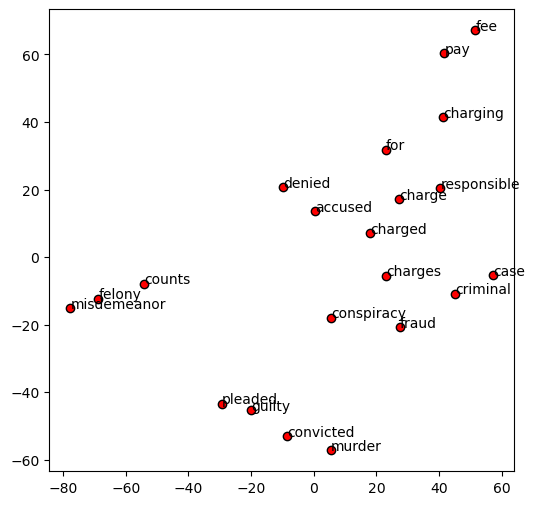

In [20]:
tsne_visualize_neighborhood("charge",space, 20)

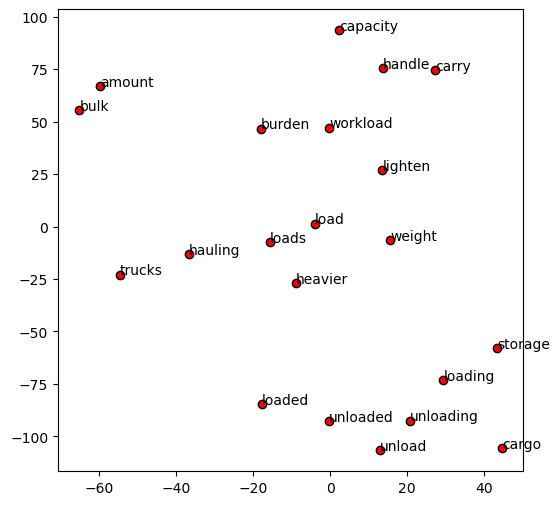

In [21]:
tsne_visualize_neighborhood("load",space, 20)

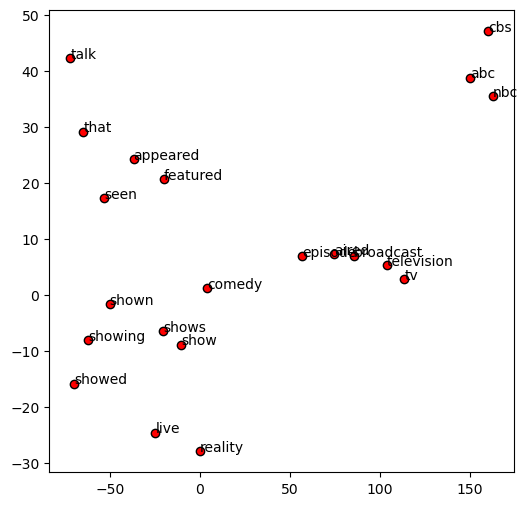

In [22]:
tsne_visualize_neighborhood("show",space, 20)